In [1]:
# Importando librerias 
%reset -f

import numpy as np
import matplotlib.pyplot as plt

from funciones import Cd
from funciones import Fi
from funciones import dv_dz

In [2]:
# Valores que quiero que el usuario cambie para jugar con ellas. 
rho_f = 1800           # Densidad fluido kg/m3
rho_p = 3000           # Densidad particula kg/m3
nu = 1.14e-6           # Viscosidad en m2/s
D = 5                  # Diametro part mm

# Constantes que no van a ser cambiadas por el usuario
Z0 = 0                 # Altura inicial m
V0 = 0                 # Velocidad inicial m/s
h = 0.001              # Paso de tiempo s
tf = 3                 # Tiempo final de simulacion s

In [3]:
# Calculo de parametros principales que pueden ser realizados una sola vez
RHO = rho_f / rho_p
A = 1 + RHO * 0.5
B = (1 - RHO) * 9.81
C = 0.75 * RHO / (D / 1000)
pasos = int(tf / h)

In [4]:
# Crear los vectores donde voy a solucionar
T = np.linspace(0, tf, pasos + 1)
V = np.zeros_like(T)
Z = np.zeros_like(T)
Zv = np.zeros_like(T)
Vv = np.zeros_like(T)

In [5]:
# Imponer condiciones iniciales
V[0] = V0
Z[0] = Z0

In [6]:
# Empezando el bucle temporal (la carne del asunto)
for i in range(1, pasos + 1):
    
    # Calculando la posicion y la velocidad cuando una esfera cae en el vacio
    # CAso ideal
    Vv[i] = V0 + 9.81 * (h * i)
    Zv[i] = Z0 + V0 * (h * i) + 0.5 * 9.81 * (h * i) ** 2
    
    # Calculando el coeficiente de arrastre por medio de la funcion externa
    CD = Cd(V[i - 1], D, nu)
    
    # Calculando los incrementales dentro de una funcion usando RK4
    # Metidos en una matriz para que pueda pasar los 8 valores necesarios
    vel = V[i - 1]
    DV, DZ = dv_dz(h, A, B, C, (D / 1000), CD, vel)
    
    # Con los valores incrementales calculados, se procede a calcular el siguiente 
    # valor de la funcion numericamente 
    Z[i] = Z[i - 1] + (1 / 6) * (DZ[0] + 2 * (DZ[1] + DZ[2]) + DZ[3]);
    V[i] = V[i - 1] + (1 / 6) * (DV[0] + 2 * (DV[1] + DV[2]) + DV[3]);

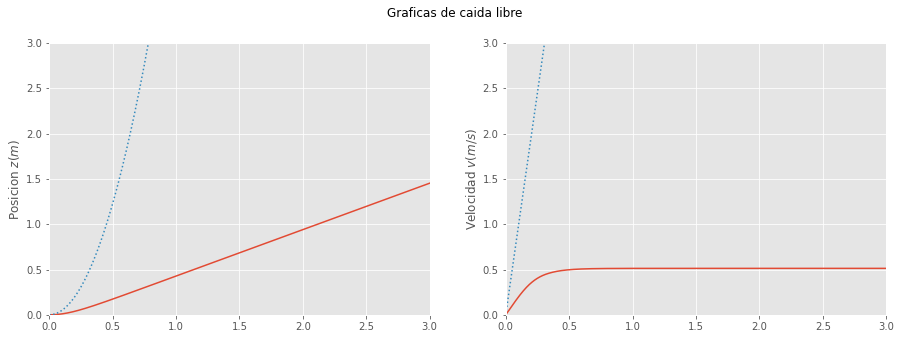

In [7]:
# Haciendo la figura yu poniéndola bonita para efectos de poder entrar a 
# hacerla en un app. Vamos a ver si la hacemos funcionar. 
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(T, Z)
axs[0].plot(T, Zv, linestyle=':')
axs[0].set_ylabel(r'Posicion $z(m)$')
axs[1].plot(T, V)
axs[1].plot(T, Vv, linestyle=':')
axs[1].set_ylabel(r'Velocidad $v(m/s)$')
axs[0].set_ylim(0, 3)
axs[1].set_ylim(0, 3)
axs[0].set_xlim(0, 3)
axs[1].set_xlim(0, 3)
fig.suptitle(r'Graficas de caida libre')
plt.show()

In [8]:
# Imprimiendo las dependencias para que esto pueda funcionar. 
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p numpy,matplotlib,watermark 

# date
print (" ")
%watermark -u -n -t -z

CPython 3.8.3
IPython 7.16.1

numpy 1.18.5
matplotlib 3.2.2
watermark 2.0.2

compiler   : GCC 7.3.0
system     : Linux
release    : 4.19.0-10-amd64
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit
 
last updated: Sat Sep 05 2020 11:02:50 -05
